In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display, Markdown
from pathlib import Path

data_dir = Path('/kaggle/input/learning-equality-curriculum-recommendations')

In [3]:
# load the data into pandas dataframes
# 加载主题，内容，主题和内容的归类情况
topics_df = pd.read_csv(data_dir / "topics.csv", index_col=0).fillna({"title": "", "description": ""})
content_df = pd.read_csv(data_dir / "content.csv", index_col=0).fillna("")
correlations_df = pd.read_csv(data_dir / "correlations.csv", index_col=0)

In [4]:
# show a random sample of the topics from the topics dataframe
topics_df.sample(frac=1).head(10)

,title,description,channel,category,level,language,parent,has_content
id,,,,,,,,
t_9feddd571e54,Funciones crecientes y decrecientes en forma g...,Se presenta situaciones donde se estudia los v...,36a98b,source,5,es,t_7bf720e09715,True
t_47c3b18f9d7f,Como remover descontinuidades,,8e286a,source,4,pt,t_36cc11814925,True
t_b83bbf9f165a,Operaciones con fracciones,Suma y resta de números mixtos y fracciones co...,36a98b,source,3,es,t_7620a6ff0d97,False
t_7e537a66f5d5,Southeast Asia,Discover the extraordinary art and architectur...,0ec697,source,3,en,t_deb53564b0ed,False
t_34ab81782acc,Introducción a la multiplicación,Bienvenido al concepto de multiplicación.,484bd2,supplemental,3,es,t_73663c5606d0,True
t_086af616fa05,20: Engineering Applications I,20: Engineering Applications I,88c9d6,supplemental,4,en,t_a5ada122e466,True
t_df543832ca58,Organisation et gestion de données,,bfc678,supplemental,2,fr,t_4e5807c1f28d,False
t_f8d55913f24c,Energias Renováveis,Precisamos mudar a maneira como consumimos os ...,0d3492,source,2,pt,t_d6cf7f73d31f,False
t_ef493d3e9cd2,វិធីគុណ​ : តម្លៃតាមខ្ទង់និងគំរូផ្ទៃ,មនុស្សភាគច្រើនរៀនចេះគុណប៉ុន្តែមានភាគតិចដែលយល់ច...,255459,source,4,km,t_de9914662061,True


In [5]:
# show a random sample of the content from the content dataframe
content_df.sample(frac=1).head(10)

,title,description,kind,text,language,copyright_holder,license
id,,,,,,,
c_b5d52e7d2979,Chapter 4: Ranges and Cells,Chapter 4 of the book on Excel VBA.,document,Chapter 4: Ranges and Cells\nSection 4.1: Ways...,en,Stack Overflow,CC BY-SA
c_cee05554fb30,અપૂર્ણાંક ઘાતાંક,"સંમેય ઘાતાંક ધરાવતા પદોની કિંમત શોધો, અને તેને...",exercise,,gu,,
c_310140c79d3f,Strategie per la divisione con i decimi,Sal utilizza le frazioni equivalenti per divid...,video,,it,,
c_6c1e691e14e3,Sztuka uliczna: używanie szablonu,W tym poradniku nauczymy Cię wykonywania szabl...,video,,pl,,
c_4033125caff8,স্থানীয় সম্পদগুলির ব্যবহার: জীবনের প্রক্রিয়াসম...,,document,স্থানীয় সম্পদ ব্যব্হার করা: জীব্ননর প্রক্রিয়াস...,bn,The Open University,CC BY-NC-SA
c_c39da5fa570b,Lección 7,"En esta lección, los estudiantes practican la ...",document,Grade 3: Module 2B: Unit 3: Lesson 7\nMid-Unit...,es,Engage NY,CC BY-NC-SA
c_af1c6fcb2e5f,Private Sector Banks in India,,video,,en,,
c_5a07402e4486,6.E: Strings (Exercises),,html5,Exercise 5: Take the following Python code tha...,en,CSU and Merlot,CC BY-NC-SA
c_f3a7f9a8cab8,Educação,,html5,,pt,,


In [7]:
# top languages by number of topics
# 按语言类别对主题进行排序
topics_df.language.value_counts().sort_values(ascending=False).head(10)

en    36161
es    13910
pt     4177
ar     3701
fr     3701
bg     2867
sw     2860
gu     2320
bn     2176
hi     1786
Name: language, dtype: int64

主题中排名前10的语言类别分别是：
en：英语（English）
es：西班牙语（Spanish）
pt：葡萄牙语（Portuguese）
ar：阿拉伯语（Arabic）
fr：法语（French）
bg：保加利亚语（Bulgarian）
sw：斯瓦希里语（Swahili）
gu：古吉拉特语（Gujarati）
bn：孟加拉语（Bengali）
hi：印地语（Hindi）

In [8]:
# top languages by number of content items
content_df.language.value_counts().sort_values(ascending=False).head(10)

en    65939
es    30844
fr    10682
pt    10435
ar     7418
bg     6050
hi     4042
zh     3849
gu     3677
bn     2513
Name: language, dtype: int64

内容中排名前10的语言分别是：en：英语（English）
es：西班牙语（Spanish）
fr：法语（French）
pt：葡萄牙语（Portuguese）
ar：阿拉伯语（Arabic）
bg：保加利亚语（Bulgarian）
hi：印地语（Hindi）
zh：中文（Chinese）
gu：古吉拉特语（Gujarati）
bn：孟加拉语（Bengali）


In [9]:
# numbers of different types of content
content_df.kind.value_counts().sort_values(ascending=False).head(10)

video       61487
document    33873
html5       32563
exercise    25925
audio         199
Name: kind, dtype: int64

内容中各种形式的排名：视频；文件；网页；习题；音频

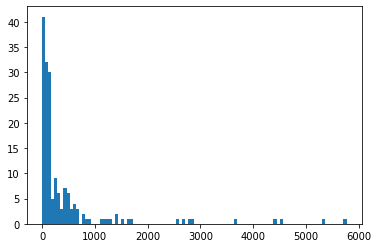

In [11]:
# sizes of different channels (in terms of numbers of topics)
plt.hist(topics_df.channel.value_counts(), bins=100)
plt.show()
# 绘制channel中每个值出现次数的直方图

In [12]:
# define some helper functions and classes to aid with data traversal
# 定义工具类辅助数据遍历
def print_markdown(md):
    display(Markdown(md))

class Topic:
    def __init__(self, topic_id):
        self.id = topic_id

    @property
    def parent(self):
        parent_id = topics_df.loc[self.id].parent
        if pd.isna(parent_id):
            return None
        else:
            return Topic(parent_id)

    @property
    def ancestors(self):
        ancestors = []
        parent = self.parent
        while parent is not None:
            ancestors.append(parent)
            parent = parent.parent
        return ancestors

    @property
    def siblings(self):
        if not self.parent:
            return []
        else:
            return [topic for topic in self.parent.children if topic != self]

    @property
    def content(self):
        if self.id in correlations_df.index:
            return [ContentItem(content_id) for content_id in correlations_df.loc[self.id].content_ids.split()]
        else:
            return tuple([]) if self.has_content else []

    def get_breadcrumbs(self, separator=" >> ", include_self=True, include_root=True):
        ancestors = self.ancestors
        if include_self:
            ancestors = [self] + ancestors
        if not include_root:
            ancestors = ancestors[:-1]
        return separator.join(reversed([a.title for a in ancestors]))

    @property
    def children(self):
        return [Topic(child_id) for child_id in topics_df[topics_df.parent == self.id].index]

    def subtree_markdown(self, depth=0):
        markdown = "  " * depth + "- " + self.title + "\n"
        for child in self.children:
            markdown += child.subtree_markdown(depth=depth + 1)
        for content in self.content:
            markdown += ("  " * (depth + 1) + "- " + "[" + content.kind.title() + "] " + content.title) + "\n"
        return markdown

    def __eq__(self, other):
        if not isinstance(other, Topic):
            return False
        return self.id == other.id

    def __getattr__(self, name):
        return topics_df.loc[self.id][name]

    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<Topic(id={self.id}, title=\"{self.title}\")>"


class ContentItem:
    def __init__(self, content_id):
        self.id = content_id

    @property
    def topics(self):
        return [Topic(topic_id) for topic_id in topics_df.loc[correlations_df[correlations_df.content_ids.str.contains(self.id)].index].index]

    def __getattr__(self, name):
        return content_df.loc[self.id][name]

    def __str__(self):
        return self.title
    
    def __repr__(self):
        return f"<ContentItem(id={self.id}, title=\"{self.title}\")>"

    def __eq__(self, other):
        if not isinstance(other, ContentItem):
            return False
        return self.id == other.id

    def get_all_breadcrumbs(self, separator=" >> ", include_root=True):
        breadcrumbs = []
        for topic in self.topics:
            new_breadcrumb = topic.get_breadcrumbs(separator=separator, include_root=include_root)
            if new_breadcrumb:
                new_breadcrumb = new_breadcrumb + separator + self.title
            else:
                new_breadcrumb = self.title
            breadcrumbs.append(new_breadcrumb)
        return breadcrumbs

In [13]:
t = Topic(topics_df.index[33])
print_markdown("\n#### Title:")
print(t.title)
print()
print_markdown("#### Description:")
print(t.description)
print()
print_markdown("#### Breadcrumbs:")   #获得课程的层次结构
print(t.get_breadcrumbs())
print()
print_markdown("#### Parent:")
print(t.parent)
print()
print_markdown("#### Siblings:")
print(t.siblings)
print()
print_markdown("#### Children:")
print(t.children)
print()
print_markdown("#### Content:")
print(t.content)
print()
if t.content:
    print_markdown("#### All breadcrumbs for first content item:")
    print_markdown("- " + "\n- ".join(t.content[0].get_all_breadcrumbs()))


#### Title:

Lección 2



#### Description:

#### Breadcrumbs:

CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2



#### Parent:

Unidad 1



#### Siblings:

[<Topic(id=t_845ee242d2b4, title="Lección 3")>, <Topic(id=t_85037a830baf, title="Lección 5")>, <Topic(id=t_95dd68c2ce5b, title="Lección 1")>, <Topic(id=t_a4e7c3871a3a, title="Lección 8")>, <Topic(id=t_e97f66f484ce, title="Lección 4")>, <Topic(id=t_ef45840f03ca, title="Lección 7")>, <Topic(id=t_fac6db0b5079, title="Lección 6")>]



#### Children:

[]



#### Content:

[<ContentItem(id=c_e7e44cb2c32d, title="Siguiendo instrucciones")>]



#### All breadcrumbs for first content item:

- CREE >> Para el Estudiante >> I Ciclo >> 02 Segundo >> Español Actvidades 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones
- CREE >> Para el Docente >> I Ciclo >> 02 Segundo >> Español GD 2do >> Unidad 1 >> Lección 2 >> Siguiendo instrucciones

In [14]:
# display a topic's subtree and associated content titles as a nested markdown list
t = Topic("t_36fd07ff5d96")
# (we truncate the output to 35 lines here to avoid overwhelming the notebook)
print_markdown("\n".join(t.subtree_markdown().split("\n")[:35]))

- Mortgages
  - [Video] Modéliser avec la somme des termes d'une suite géométrique - exemple 2


count    61517.000000
mean         4.550271
std          6.700255
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        293.000000
dtype: float64

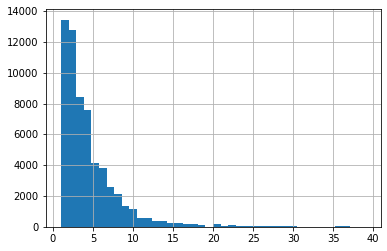

In [15]:
# how many content items are correlated with each topic?
# 计算每个主题相关联的内容项数量
content_per_topic = pd.Series([len(cids.split()) for cids in correlations_df.content_ids])
content_per_topic[content_per_topic < 40].hist(bins=40)
content_per_topic.describe()